`We will be training our model on the preprocessed dataset.`

<a>Instead of predicting Classes, we will predict FWI (Fire Weather Index)</a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Algerian_forest_fires_preprocessed_dataset.csv")

In [4]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df=df.iloc[:,1:]

In [11]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0


In [12]:
df['Classes'].value_counts

<bound method IndexOpsMixin.value_counts of 1      0
2      0
3      0
4      0
5      1
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 242, dtype: int64>

In [13]:
X=df.drop('FWI', axis=1)
y=df['FWI']

In [14]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,1,0


In [15]:
y.head()

1    0.4
2    0.1
3    0.0
4    0.5
5    2.5
Name: FWI, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

In [19]:
X_train.shape, X_test.shape

((181, 11), (61, 11))

In [29]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.647300,-0.274746,-0.345614,0.705055,0.492890,0.376148,0.628735,0.465267,0.545200,0.253777
RH,-0.647300,1.000000,0.231939,0.234878,-0.641884,-0.417732,-0.250138,-0.700552,-0.367746,-0.457546,-0.374339
Ws,-0.274746,0.231939,1.000000,0.182579,-0.120296,0.000381,0.100480,0.032940,0.037951,-0.030047,-0.249348
Rain,-0.345614,0.234878,0.182579,1.000000,-0.552525,-0.286043,-0.296688,-0.342808,-0.296684,-0.374895,-0.068452
FFMC,0.705055,-0.641884,-0.120296,-0.552525,1.000000,0.615820,0.533490,0.745063,0.605854,0.767070,0.209257
DMC,0.492890,-0.417732,0.000381,-0.286043,0.615820,1.000000,0.875484,0.692319,0.983266,0.621456,0.188130
DC,0.376148,-0.250138,0.100480,-0.296688,0.533490,0.875484,1.000000,0.552843,0.947023,0.555910,-0.091729
ISI,0.628735,-0.700552,0.032940,-0.342808,0.745063,0.692319,0.552843,1.000000,0.659996,0.757627,0.253274
BUI,0.465267,-0.367746,0.037951,-0.296684,0.605854,0.983266,0.947023,0.659996,1.000000,0.618737,0.086215
Classes,0.545200,-0.457546,-0.030047,-0.374895,0.767070,0.621456,0.555910,0.757627,0.618737,1.000000,0.160857


`We need to remove features that are highly correlated with each other, to reduce errors in measuring our coefficent values for regression`

we will be eliminating feautres that have a correlation value of > 0.85. How did we come up with this threashold? Usually a domain expert or a statistician tells us what threshold to choose.

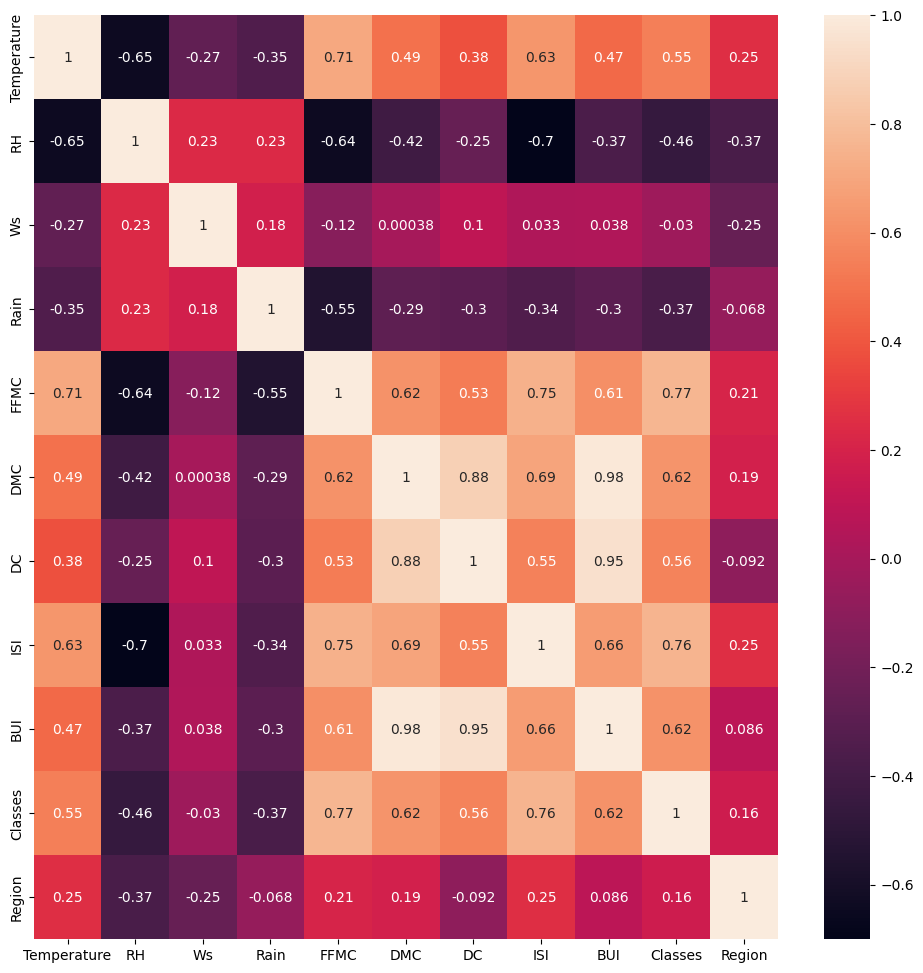

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

if we loop through the matrix and check every combo, it will take us O(n^2). What we can do is, for each row, we could check columns until row-1, this way we could have all the combos.
therefore, for the first row, don't check anything, for the second row(RH) just check the first column.<br> for the third row(Ws) check the first two columns and so on

In [46]:
# for i in range(len(X_train.corr())):
#     for j in range(len(X_train.corr().iloc[1])):
#         print(X_train.corr().iloc[i,j]) 
#above is a code that prints every value in the correlation matrix.

1.0
-0.6473000871158994
-0.27474637043085115
-0.34561391168525174
0.7050553758115982
0.4928897297739441
0.3761477253831376
0.628735067429567
0.4652665699541396
0.5452004060923255
0.25377685614830875
-0.6473000871158994
1.0
0.2319385571821702
0.23487804412402993
-0.6418842939938231
-0.4177315572142033
-0.2501378761443898
-0.7005520161009857
-0.36774632021139564
-0.4575457560086233
-0.3743393385203272
-0.27474637043085115
0.2319385571821702
1.0
0.18257850732132871
-0.12029617394656834
0.0003808187440347672
0.10047972592416508
0.03294008096206947
0.03795118247847272
-0.030047300965621384
-0.24934794834307583
-0.34561391168525174
0.23487804412402993
0.18257850732132871
1.0
-0.5525247674283299
-0.2860431505351899
-0.29668778136745866
-0.342808257351132
-0.2966839062526216
-0.37489512758623605
-0.068451973987908
0.7050553758115982
-0.6418842939938231
-0.12029617394656834
-0.5525247674283299
1.0
0.6158201914720587
0.5334898916005432
0.7450627450277
0.6058544026529445
0.7670697113966354
0.2092

In [47]:
# for i in range(len(X_train.corr())):
#     for j in range(i): #this way j only check upto row_number-1 columns.
#         #this way we get zero repeat values
#         print(X_train.corr().iloc[i,j]) 

-0.6473000871158994
-0.27474637043085115
0.2319385571821702
-0.34561391168525174
0.23487804412402993
0.18257850732132871
0.7050553758115982
-0.6418842939938231
-0.12029617394656834
-0.5525247674283299
0.4928897297739441
-0.4177315572142033
0.0003808187440347672
-0.2860431505351899
0.6158201914720587
0.3761477253831376
-0.2501378761443898
0.10047972592416508
-0.29668778136745866
0.5334898916005432
0.8754842099240399
0.628735067429567
-0.7005520161009857
0.03294008096206947
-0.342808257351132
0.7450627450277
0.6923193751081956
0.5528431087395219
0.4652665699541396
-0.36774632021139564
0.03795118247847272
-0.2966839062526216
0.6058544026529445
0.9832658573089706
0.947022555407422
0.6599962278159235
0.5452004060923255
-0.4575457560086233
-0.030047300965621384
-0.37489512758623605
0.7670697113966354
0.6214564192216101
0.5559102847562771
0.7576268655428917
0.618737409914386
0.25377685614830875
-0.3743393385203272
-0.24934794834307583
-0.068451973987908
0.20925747856578686
0.1881301845179705


In [49]:
X_train.columns[0]

'Temperature'

`the following function returns a list of features that are highly correlated with some other feature and therefore should be removed from our dataset`

In [55]:
def correlation(dataset, threshold):
    high_corr_features=set()
    corr_matrix=dataset.corr()
    for i in range(len(dataset.corr())):
        for j in range(i): #this way j only check upto row_number-1 columns.
        #this way we get zero repeat values
            if(corr_matrix.iloc[i,j]>0.85):
                #add it to our high_corr_features list
                name_of_feature=dataset.columns[i]
                high_corr_features.add(name_of_feature)
    return high_corr_features

In [56]:
high_corr_features=correlation(X_train, 0.85)

In [57]:
high_corr_features #guess me messed up some function logic

{'BUI', 'DC'}

In [63]:
X_train.drop(high_corr_features, axis=1, inplace=True)
X_test.drop(high_corr_features, axis=1, inplace=True)

In [64]:
X_test.shape, X_train.shape

((61, 9), (181, 9))

`Feature Scaling`

In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [107]:
scaler=StandardScaler()

In [108]:
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled[7:]

array([[ 0.77714921, -1.94538341,  0.20382133, ...,  0.67166033,
         0.94096582,  1.00554021],
       [-2.6927409 ,  0.86671104,  3.85646105, ..., -1.01155085,
        -1.06273786, -0.99449032],
       [-0.82433853, -0.40542693, -0.52670661, ...,  0.74278193,
         0.94096582, -0.99449032],
       ...,
       [-2.6927409 ,  1.53625733, -0.16144264, ..., -1.10637965,
        -1.06273786, -0.99449032],
       [ 1.04406383, -0.47238156,  0.20382133, ...,  0.83761073,
         0.94096582,  1.00554021],
       [-0.82433853,  1.67016659, -0.89197058, ..., -0.82189325,
        -1.06273786, -0.99449032]])

In [109]:
X_test_scaled=scaler.transform(X_test)

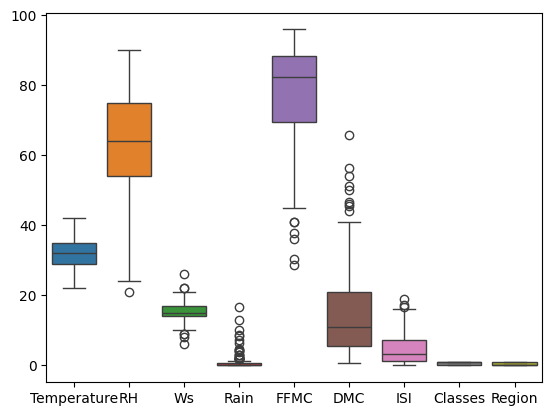

In [110]:
sns.boxplot(X_train)
plt.show()

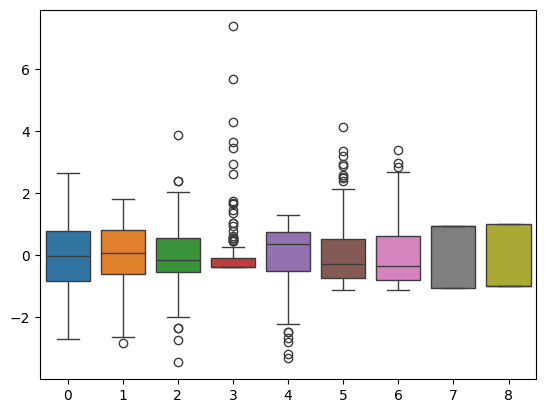

In [111]:
sns.boxplot(X_train_scaled)
plt.show()

In [112]:
from sklearn.metrics import r2_score, mean_absolute_error

`Multiple Linear Regression Model`

In [113]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [114]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [115]:
print("Mean ABsolute Error ", mean_absolute_error(y_test, lr.predict(X_test_scaled)))
print("R squared", r2_score(y_test, lr.predict(X_test_scaled)))

Mean ABsolute Error  0.6006309656848243
R squared 0.9814013168526051


# Lasso

In [116]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.10798849250283
R2 Score 0.95186910166402


In [117]:
lasso.coef_ #only one feature selected fro some reason.

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        3.01227599,  3.85337699,  0.        , -0.        ])

In [118]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
print("Mean absolute error", mean_absolute_error(y_test,y_pred))
print("R2 Score", r2_score(y_test,y_pred))

Mean absolute error 0.6316998441097766
R2 Score 0.9804468127120508


`ElasticNet Regression`

In [119]:
from sklearn.linear_model import ElasticNet

In [120]:
elasticNet=ElasticNet()
elasticNet.fit(X_train_scaled, y_train)
print("Mean absolute error", mean_absolute_error(y_test, elasticNet.predict(X_test_scaled)))
print("R squared Error", r2_score(y_test, elasticNet.predict(X_test_scaled)))

Mean absolute error 1.8988576462936022
R squared Error 0.8715879544122654


The best score is being given by ridge Regression. let us serialise this object to so that it can be used in our flask app. 

In [121]:
import pickle
pickle.dump(scaler, open("scaler.pkl", 'wb'))
pickle.dump(ridge, open("ridge.pkl", 'wb'))